### **CARGA DE PAQUETES**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **CARGA DE DATOS**

Cada una de las variables que componen el modelo estaba recogida en un documento .csv, por lo que se han tenido que cargar todos los documentos y se han combinado teniendo en cuenta de que para cada observación de cada una de las variables se tenía el dato de la Comunidad Autonoma y del Periodo (Año) a los cuales se refería

In [46]:
# Leer los archivos CSV 
df1 = pd.read_csv("C:\\DATOS TFG\\actividad.csv", encoding='ISO-8859-1',sep=';')
df2 = pd.read_csv("C:\\DATOS TFG\\censo.csv", encoding='ISO-8859-1',sep=';')
df3 = pd.read_csv("C:\\DATOS TFG\\delitos.csv", encoding='ISO-8859-1',sep=';')
df4= pd.read_csv("C:\\DATOS TFG\\gasto medio hogares.csv", encoding='ISO-8859-1',sep=';')
df5= pd.read_csv("C:\\DATOS TFG\\gasto proteccion ambiental.csv", encoding='ISO-8859-1',sep=';')
df6= pd.read_csv("C:\\DATOS TFG\\importehipotecas.csv", encoding='ISO-8859-1',sep=';')
df7= pd.read_csv("C:\\DATOS TFG\\IngresosMedios.csv", encoding='ISO-8859-1',sep=';')
df8= pd.read_csv("C:\\DATOS TFG\\IPC.csv", encoding='ISO-8859-1',sep=';')
df9= pd.read_csv("C:\\DATOS TFG\\IPV.csv", encoding='ISO-8859-1',sep=';')
df10= pd.read_csv("C:\\DATOS TFG\\numero hogares.csv", encoding='ISO-8859-1',sep=';')
df11= pd.read_csv("C:\\DATOS TFG\\PIB.csv", encoding='ISO-8859-1',sep=';')
df12= pd.read_csv("C:\\DATOS TFG\\Emisiones.csv", encoding='ISO-8859-1',sep=';')
df13= pd.read_csv("C:\\DATOS TFG\\Precios suelo.csv", encoding='ISO-8859-1',sep=';')


# Realizar el merge secuencialmente, usando las columnas en común
data = pd.merge(df1, df2, on=["Comunidad Autonoma", "Periodo"], how="outer")  
data = pd.merge(data, df3, on=["Comunidad Autonoma", "Periodo"], how="outer") 
data = pd.merge(data, df4, on=["Comunidad Autonoma", "Periodo"], how="outer") 
data = pd.merge(data, df5, on=["Comunidad Autonoma", "Periodo"], how="outer") 
data = pd.merge(data, df6, on=["Comunidad Autonoma", "Periodo"], how="outer") 
data = pd.merge(data, df7, on=["Comunidad Autonoma", "Periodo"], how="outer") 
data = pd.merge(data, df8, on=["Comunidad Autonoma", "Periodo"], how="outer") 
data = pd.merge(data, df9, on=["Comunidad Autonoma", "Periodo"], how="outer") 
data = pd.merge(data, df10, on=["Comunidad Autonoma", "Periodo"], how="outer") 
data = pd.merge(data, df11, on=["Comunidad Autonoma", "Periodo"], how="outer") 
data = pd.merge(data, df12, on=["Comunidad Autonoma", "Periodo"], how="outer") 
data = pd.merge(data, df13, on=["Comunidad Autonoma", "Periodo"], how="outer") 

# Guardar el archivo combinado
data.to_csv("C:\\DATOS TFG\\data.csv", index=False)
print(data.head())


  Comunidad Autonoma  Periodo Actividad Censo  Criminalidad GastoHogares  \
0       01 Andalucía     2000       NaN   NaN           NaN          NaN   
1       01 Andalucía     2001       NaN   NaN           NaN          NaN   
2       01 Andalucía     2002       NaN   NaN           NaN          NaN   
3       01 Andalucía     2003       NaN   NaN           NaN          NaN   
4       01 Andalucía     2004       NaN   NaN           NaN          NaN   

  GastoProteccionAmbiental  Hipotecas  IngresosMedios     IPC TipoVivienda  \
0                      NaN        NaN             NaN     NaN          NaN   
1                      NaN        NaN             NaN     NaN          NaN   
2                      NaN        NaN             NaN  73,207          NaN   
3                      NaN    905.392             NaN  75,097          NaN   
4                      NaN  1.722.680             NaN   77,42          NaN   

   IPV NumHabitaciones NumHogares  PIB  Emisiones GEI Precio del suelo  
0

Se han tenido que formatear los datos para que las variables numéricas fueran identificadas con tipo int64 o float

In [47]:
# Observar los tipos de dato de cada variable
print(data.dtypes)

# Limpieza de las columnas con coma como decimal y punto como miles
columnas_puntos = ["Censo","Criminalidad","Emisiones GEI","GastoHogares", "GastoProteccionAmbiental","Hipotecas", "NumHogares","IngresosMedios"]

columnas_comas=["GastoHogares","Actividad","IPC","IPV","PIB","Precio del suelo","NumHogares"]

# Procesar las columnas con puntos como miles
for columna in columnas_puntos:
    data[columna] = data[columna].astype(str).str.replace(".", "", regex=False)

# Procesar las columnas con comas como decimales
for columna in columnas_comas:
    data[columna] = data[columna].astype(str).str.replace(",", ".", regex=False)

# Convertir todas las columnas a tipo numérico
for columna in columnas_puntos + columnas_comas:
    data[columna] = pd.to_numeric(data[columna], errors="coerce")

# Manejar valores NaN (opcional: rellenar con 0 o la mediana, según tu preferencia)
data.fillna(0, inplace=True)


Comunidad Autonoma           object
Periodo                       int64
Actividad                    object
Censo                        object
Criminalidad                float64
GastoHogares                 object
GastoProteccionAmbiental     object
Hipotecas                    object
IngresosMedios              float64
IPC                          object
TipoVivienda                 object
IPV                          object
NumHabitaciones              object
NumHogares                   object
PIB                          object
Emisiones GEI               float64
Precio del suelo             object
dtype: object


In [48]:
# Verificar tipos de datos después de la conversión
print(data.dtypes)
print(data.head())

Comunidad Autonoma           object
Periodo                       int64
Actividad                   float64
Censo                       float64
Criminalidad                float64
GastoHogares                float64
GastoProteccionAmbiental    float64
Hipotecas                   float64
IngresosMedios              float64
IPC                         float64
TipoVivienda                 object
IPV                         float64
NumHabitaciones              object
NumHogares                  float64
PIB                         float64
Emisiones GEI               float64
Precio del suelo            float64
dtype: object
  Comunidad Autonoma  Periodo  Actividad  Censo  Criminalidad  GastoHogares  \
0       01 Andalucía     2000        0.0    0.0           0.0           0.0   
1       01 Andalucía     2001        0.0    0.0           0.0           0.0   
2       01 Andalucía     2002        0.0    0.0           0.0           0.0   
3       01 Andalucía     2003        0.0    0.0           

### CÁLCULO MEDIDAS DE DISPERSIÓN

In [49]:
# Columnas numéricas
columnas_numericas = data.select_dtypes(include=["float64", "int64"]).columns

# Columnas categóricas
columnas_categoricas = data.select_dtypes(include=["object"]).columns

Para las variables numéricas se calcularán la media, mediana, moda, varianza, desviación estándar y rango.

In [50]:
print(data[columnas_numericas].describe())

           Periodo    Actividad         Censo   Criminalidad  GastoHogares  \
count  1460.000000  1460.000000  1.460000e+03    1460.000000   1460.000000   
mean   2014.520548    47.037808  3.258362e+05   23646.608219  25685.399500   
std       5.355388    23.105110  2.910952e+06   65577.902094   8937.159372   
min    2000.000000     0.000000  0.000000e+00       0.000000      0.000000   
25%    2012.000000    53.100000  0.000000e+00       0.000000  25090.470000   
50%    2015.000000    57.800000  0.000000e+00    4900.000000  27491.100000   
75%    2018.000000    59.500000  0.000000e+00   15575.000000  30233.430000   
max    2024.000000    65.900000  4.808536e+07  426416.000000  39081.030000   

       GastoProteccionAmbiental     Hipotecas  IngresosMedios          IPC  \
count              1.460000e+03  1.460000e+03     1460.000000  1460.000000   
mean               5.859070e+07  3.454799e+05     8509.544521    90.548073   
std                1.454356e+08  9.621549e+05     4886.074391  

Para las variables categóricas se calculará la frecuencia de cada una de sus clases

In [51]:
# Frecuencia de las categorías en TipoVivienda
frecuencia_tipovivienda = data["TipoVivienda"].value_counts()

# Frecuencia de las categorías en NumHabitaciones
frecuencia_numhabitaciones = data["NumHabitaciones"].value_counts()

print("Frecuencias de TipoVivienda:")
print(frecuencia_tipovivienda)

print("\nFrecuencias de NumHabitaciones:")
print(frecuencia_numhabitaciones)

Frecuencias de TipoVivienda:
TipoVivienda
Vivienda nueva           640
Vivienda segunda mano    640
0                        180
Name: count, dtype: int64

Frecuencias de NumHabitaciones:
NumHabitaciones
0                           500
Menos de 3 habitaciones     320
Entre 3 y 6 habitaciones    320
7 o más habitaciones        320
Name: count, dtype: int64


Para las observaciones que no tiene un dato sobre el tipo de vivienda o el número de habitaciones, toma como clase el número 0, lo que puede conllevar problemas en el momento de realizar la imputación directa de los valores faltantes. Por ello, se tomará la clase 0 como un valor nulo

In [52]:
# Reemplazar el valor '0' con NaN en TipoVivienda
data["TipoVivienda"] = data["TipoVivienda"].replace(0, np.nan)
# Reemplazar el valor '0' con NaN en NumHabitaciones
data["NumHabitaciones"] = data["NumHabitaciones"].replace(0, np.nan)

In [53]:
# Frecuencia de las categorías en TipoVivienda
frecuencia_tipovivienda = data["TipoVivienda"].value_counts()

# Frecuencia de las categorías en NumHabitaciones
frecuencia_numhabitaciones = data["NumHabitaciones"].value_counts()

print("Frecuencias de TipoVivienda:")
print(frecuencia_tipovivienda)

print("\nFrecuencias de NumHabitaciones:")
print(frecuencia_numhabitaciones)

Frecuencias de TipoVivienda:
TipoVivienda
Vivienda nueva           640
Vivienda segunda mano    640
Name: count, dtype: int64

Frecuencias de NumHabitaciones:
NumHabitaciones
Menos de 3 habitaciones     320
Entre 3 y 6 habitaciones    320
7 o más habitaciones        320
Name: count, dtype: int64


### TRATAMIENTO DE VALORES FALTANTES: IMPUTACIÓN DIRECTA

Dependiendo del tipo de variable a tratar (numérica o categórica) se utilizarán métodos diferentes.

In [54]:
print("Columnas numéricas:", columnas_numericas)
print("Columnas categóricas:", columnas_categoricas)

Columnas numéricas: Index(['Periodo', 'Actividad', 'Censo', 'Criminalidad', 'GastoHogares',
       'GastoProteccionAmbiental', 'Hipotecas', 'IngresosMedios', 'IPC', 'IPV',
       'NumHogares', 'PIB', 'Emisiones GEI', 'Precio del suelo'],
      dtype='object')
Columnas categóricas: Index(['Comunidad Autonoma', 'TipoVivienda', 'NumHabitaciones'], dtype='object')


Del dataset completo, eliminar España

In [55]:
data = data[~data["Comunidad Autonoma"].isin(["España", "18 Ceuta", "19 Melilla"])]
data.to_csv("C:\\DATOS TFG\\data2.csv", index=False)
print(data.head())

  Comunidad Autonoma  Periodo  Actividad  Censo  Criminalidad  GastoHogares  \
0       01 Andalucía     2000        0.0    0.0           0.0           0.0   
1       01 Andalucía     2001        0.0    0.0           0.0           0.0   
2       01 Andalucía     2002        0.0    0.0           0.0           0.0   
3       01 Andalucía     2003        0.0    0.0           0.0           0.0   
4       01 Andalucía     2004        0.0    0.0           0.0           0.0   

   GastoProteccionAmbiental  Hipotecas  IngresosMedios     IPC TipoVivienda  \
0                       0.0        0.0             0.0   0.000          NaN   
1                       0.0        0.0             0.0   0.000          NaN   
2                       0.0        0.0             0.0  73.207          NaN   
3                       0.0   905392.0             0.0  75.097          NaN   
4                       0.0  1722680.0             0.0  77.420          NaN   

   IPV NumHabitaciones  NumHogares  PIB  Emisiones

En el caso de las variables numéricas, se imputarán los valores faltantes como la mediana de cada una de las variables

In [56]:
print(data[columnas_numericas].median())


Periodo                     2.015000e+03
Actividad                   5.760000e+01
Censo                       0.000000e+00
Criminalidad                6.358000e+03
GastoHogares                2.723361e+04
GastoProteccionAmbiental    2.395811e+07
Hipotecas                   8.286300e+04
IngresosMedios              1.010600e+04
IPC                         9.495700e+01
IPV                         1.063840e+02
NumHogares                  1.770000e+01
PIB                         0.000000e+00
Emisiones GEI               1.302100e+04
Precio del suelo            1.443400e+02
dtype: float64


In [57]:
# Reemplazar el valor '0' con NaN en NumHabitaciones
data[columnas_numericas] = data[columnas_numericas].replace(0, np.nan)

# Función para calcular la mediana manualmente
def mediana_manual(serie):
    valores = serie.dropna().sort_values()  # Eliminar valores NaN y ordenar
    n = len(valores)
    if n % 2 == 0:  # Si el número de elementos es par
        mediana = (valores.iloc[n // 2 - 1] + valores.iloc[n // 2]) / 2
    else:  # Si el número de elementos es impar
        mediana = valores.iloc[n // 2]
    return mediana

# Aplicar la función a cada columna numérica
medianas = {col: mediana_manual(data[col]) for col in columnas_numericas}

# Imprimir las medianas calculadas manualmente
print("Medianas calculadas manualmente:")
for col, med in medianas.items():
    print(f"{col}: {med}")

# Imputar valores faltantes usando las medianas calculadas manualmente
for columna in columnas_numericas:
    data[columna] = data[columna].fillna(medianas[columna])

# Verificar el resultado después de la imputación
print(data[columnas_numericas].describe())


Medianas calculadas manualmente:
Periodo: 2015
Actividad: 58.6
Censo: 2058278.0
Criminalidad: 11092.5
GastoHogares: 27695.68
GastoProteccionAmbiental: 30083672.0
Hipotecas: 85994.0
IngresosMedios: 10686.0
IPC: 95.104
IPV: 109.46
NumHogares: 108.65
PIB: 2.349
Emisiones GEI: 13418.0
Precio del suelo: 148.17
           Periodo    Actividad         Censo  Criminalidad  GastoHogares  \
count  1241.000000  1241.000000  1.241000e+03   1241.000000   1241.000000   
mean   2014.520548    58.192425  2.108287e+06  16354.163175  28260.184835   
std       5.355712     3.066574  6.859418e+05  16962.155128   3304.795313   
min    2000.000000    49.700000  3.194440e+05     70.000000  21844.350000   
25%    2012.000000    56.200000  2.058278e+06   8656.000000  26061.700000   
50%    2015.000000    58.600000  2.058278e+06  11092.500000  27695.680000   
75%    2018.000000    59.500000  2.058278e+06  15699.000000  30229.320000   
max    2024.000000    65.900000  8.584147e+06  82489.000000  39081.030000   


En el caso de las variables categóricas, se reemplazan los valores nulos por la moda

In [58]:
# Asegurar que las columnas categóricas sean de tipo "object"
for columna in columnas_categoricas:
    data[columna] = data[columna].astype("object")

# Imputar valores faltantes en columnas categóricas con la moda
for columna in columnas_categoricas:
    if data[columna].isnull().sum() > 0:  # Solo imputar si hay valores faltantes
        data[columna].fillna(data[columna].mode()[0], inplace=True)

# Verificar que no queden valores nulos
print("Valores faltantes en columnas categóricas después de la imputación:")
print(data[columnas_categoricas].isnull().sum())

# Mostrar las primeras filas de las columnas categóricas
for columna in columnas_categoricas:
    print(f"Valores únicos en {columna}:")
    print(data[columna].unique())

data.to_csv("C:\\DATOS TFG\\datasetfinal.csv", index=False)


Valores faltantes en columnas categóricas después de la imputación:
Comunidad Autonoma    0
TipoVivienda          0
NumHabitaciones       0
dtype: int64
Valores únicos en Comunidad Autonoma:
['01 Andalucía' '02 Aragón' '03 Asturias, Principado de'
 '04 Balears, Illes' '05 Canarias' '06 Cantabria' '07 Castilla y León'
 '08 Castilla - La Mancha' '09 Cataluña' '10 Comunitat Valenciana'
 '11 Extremadura' '12 Galicia' '13 Madrid, Comunidad de'
 '14 Murcia, Región de' '15 Navarra, Comunidad Foral de' '16 País Vasco'
 '17 Rioja, La']
Valores únicos en TipoVivienda:
['Vivienda nueva' 'Vivienda segunda mano']
Valores únicos en NumHabitaciones:
['7 o más habitaciones' 'Menos de 3 habitaciones'
 'Entre 3 y 6 habitaciones']


C:\Users\mclla\AppData\Local\Temp\ipykernel_15044\2774368106.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[columna].fillna(data[columna].mode()[0], inplace=True)


In [59]:
# Frecuencia de las categorías en TipoVivienda
frecuencia_tipovivienda = data["TipoVivienda"].value_counts()

# Frecuencia de las categorías en NumHabitaciones
frecuencia_numhabitaciones = data["NumHabitaciones"].value_counts()

print("Frecuencias de TipoVivienda:")
print(frecuencia_tipovivienda)

print("\nFrecuencias de NumHabitaciones:")
print(frecuencia_numhabitaciones)

Frecuencias de TipoVivienda:
TipoVivienda
Vivienda nueva           697
Vivienda segunda mano    544
Name: count, dtype: int64

Frecuencias de NumHabitaciones:
NumHabitaciones
7 o más habitaciones        697
Menos de 3 habitaciones     272
Entre 3 y 6 habitaciones    272
Name: count, dtype: int64


### BOXPLOT

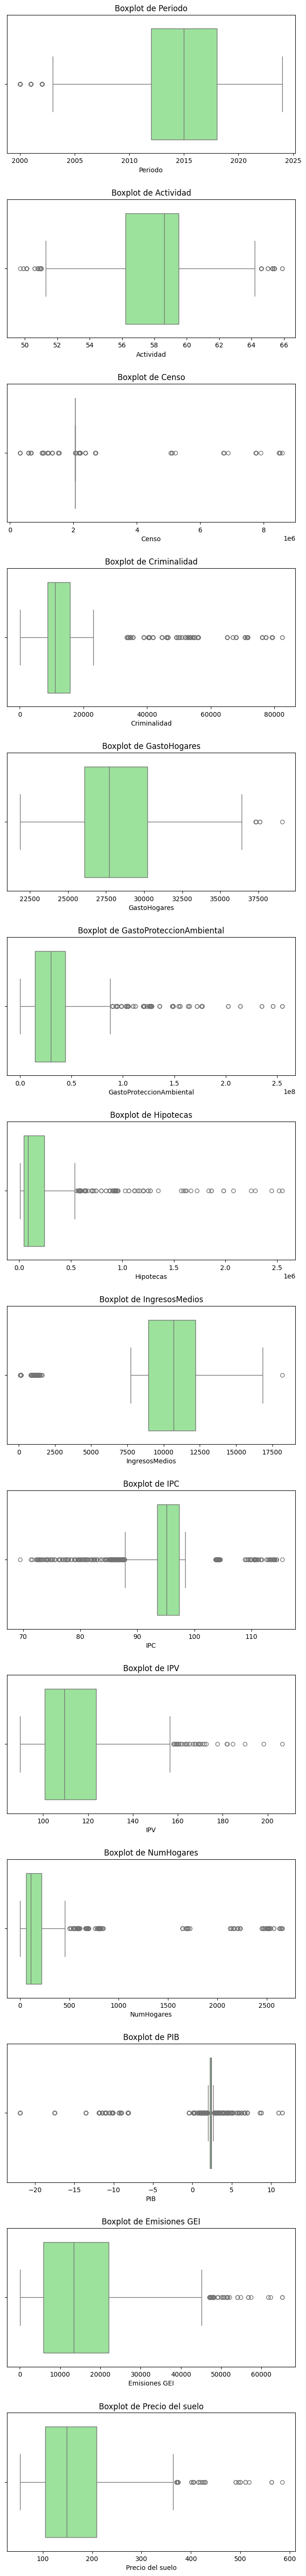

In [60]:
# Crear subplots con boxplots individuales para cada columna numérica
columnas_numericas = data.select_dtypes(include=["float64", "int64"]).columns

fig, axes = plt.subplots(nrows=len(columnas_numericas), ncols=1, figsize=(8, 4 * len(columnas_numericas)))
fig.tight_layout(pad=5.0)

for i, columna in enumerate(columnas_numericas):
    sns.boxplot(data=data, x=columna, ax=axes[i], color="lightgreen")
    axes[i].set_title(f"Boxplot de {columna}")

plt.show()


Matriz de correlación:
                           Periodo  Actividad     Censo  Criminalidad  \
Periodo                   1.000000  -0.142119  0.099361      0.166041   
Actividad                -0.142119   1.000000  0.061240      0.256562   
Censo                     0.099361   0.061240  1.000000      0.288851   
Criminalidad              0.166041   0.256562  0.288851      1.000000   
GastoHogares              0.015751   0.321608  0.095420      0.128857   
GastoProteccionAmbiental  0.022817  -0.037006  0.279618      0.540492   
Hipotecas                -0.146463   0.248186  0.244668      0.369649   
IngresosMedios           -0.025303  -0.024928  0.056844      0.019033   
IPC                       0.803249  -0.119998  0.147484      0.135823   
IPV                      -0.036637   0.040976  0.129015      0.069271   
NumHogares                0.124067   0.134808 -0.024120      0.451117   
PIB                      -0.249079   0.039285  0.063674      0.043496   
Emisiones GEI            -0.

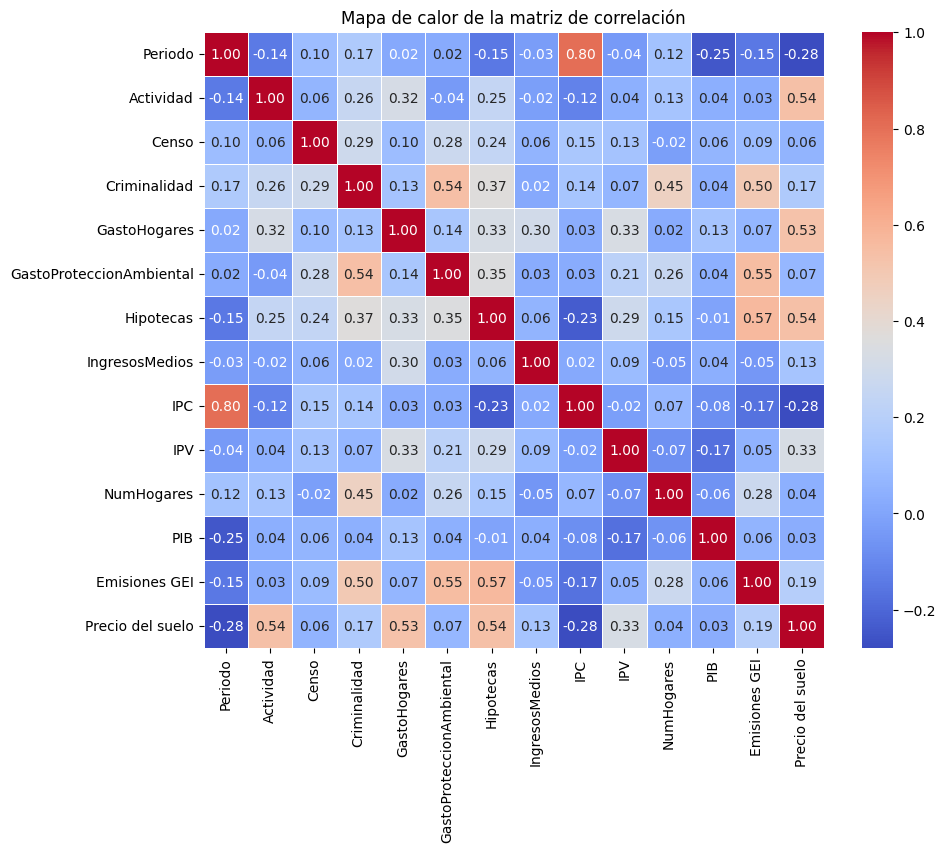

In [61]:
# Seleccionar solo las columnas numéricas
numericas = data.select_dtypes(include=["float64", "int64"])

# Calcular la matriz de correlación
correlacion = numericas.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlacion)

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de la matriz de correlación")
plt.show()


C:\Users\mclla\AppData\Local\Temp\ipykernel_15044\4240173686.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=categoria, y="IPV", palette="Set2")


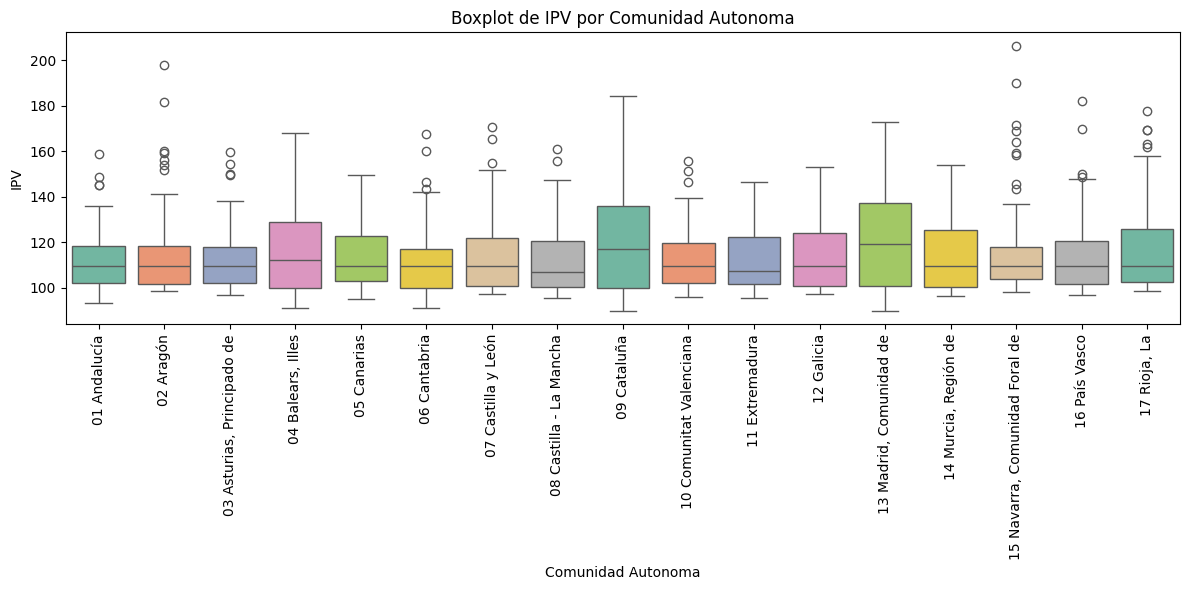

C:\Users\mclla\AppData\Local\Temp\ipykernel_15044\4240173686.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=categoria, y="IPV", palette="Set2")


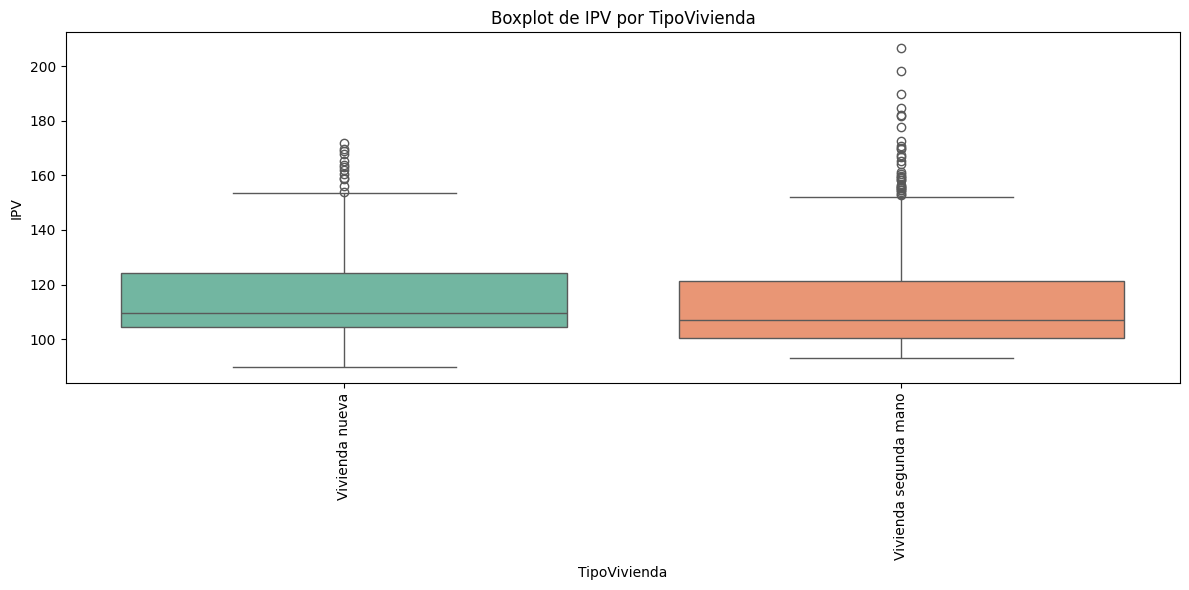

C:\Users\mclla\AppData\Local\Temp\ipykernel_15044\4240173686.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=categoria, y="IPV", palette="Set2")


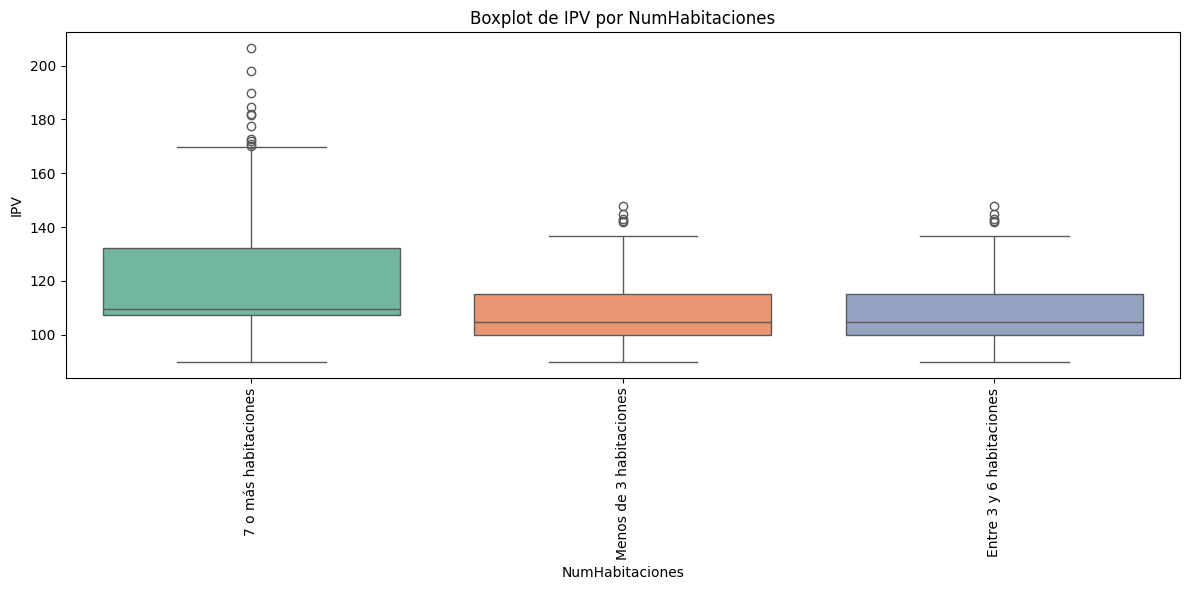

In [62]:
# Variables categóricas
categoricas = ["Comunidad Autonoma", "TipoVivienda", "NumHabitaciones"]


# Crear boxplots para visualizar la relación entre IPV y las variables categóricas
for categoria in categoricas:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=categoria, y="IPV", palette="Set2")
    # Rotar etiquetas y ajustar tamaño de fuente
    plt.xticks(rotation=90, fontsize=10)
    plt.title(f"Boxplot de IPV por {categoria}")
    plt.tight_layout()
    plt.show()


<Figure size 1200x600 with 0 Axes>

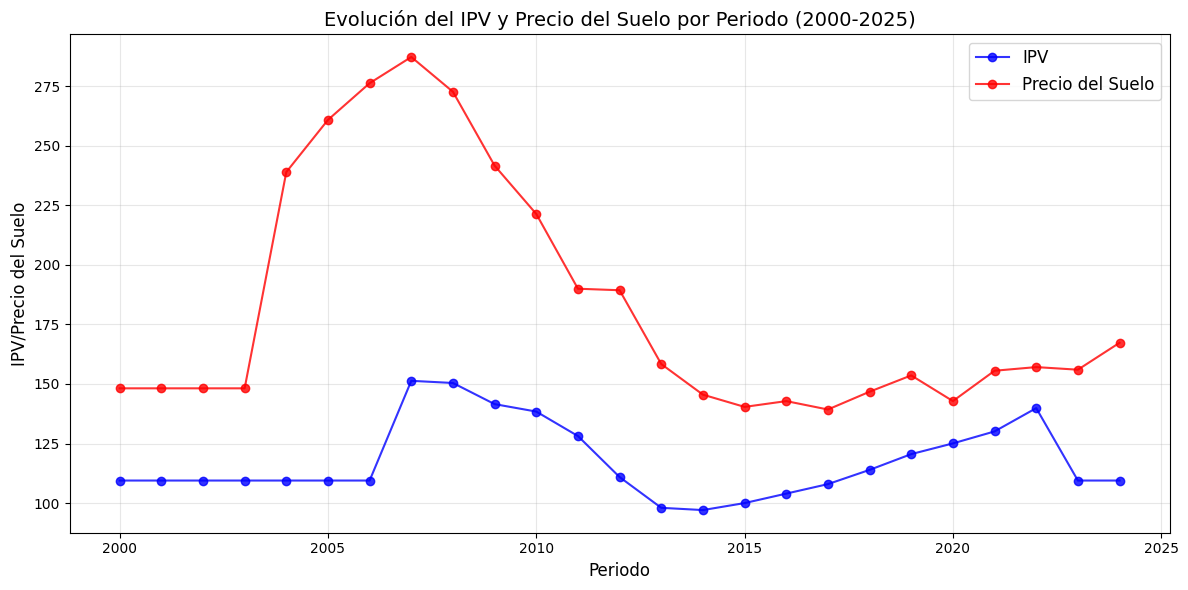

In [63]:
# Crear la figura del gráfico
plt.figure(figsize=(12, 6))

# Agrupar los datos por 'Periodo' y calcular la media de IPV y Precio del Suelo
ipv = data.groupby('Periodo')['IPV'].mean()
preciosuelo = data.groupby('Periodo')['Precio del suelo'].mean()

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(ipv.index, ipv.values, marker='o', linestyle='-', color='b', alpha=0.8, label='IPV')
plt.plot(preciosuelo.index, preciosuelo.values, marker='o', linestyle='-', color='r', alpha=0.8, label='Precio del Suelo')

# Personalización del gráfico
plt.xlabel('Periodo', fontsize=12)
plt.ylabel('IPV/Precio del Suelo', fontsize=12)
plt.title('Evolución del IPV y Precio del Suelo por Periodo (2000-2025)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.3)

# Agregar la leyenda
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


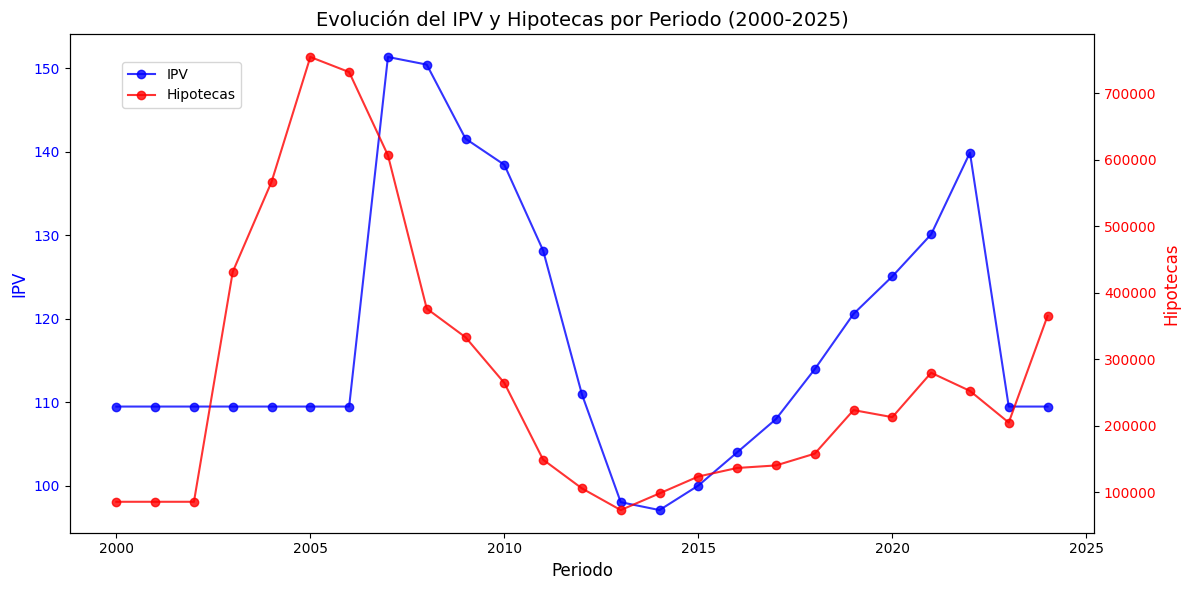

In [64]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Agrupar los datos por 'Periodo' y calcular la media de IPV y Hipotecas
ipv = data.groupby('Periodo')['IPV'].mean()
hipotecas = data.groupby('Periodo')['Hipotecas'].mean()

# Gráfico para el IPV en el eje Y izquierdo
ax1.plot(ipv.index, ipv.values, marker='o', linestyle='-', color='b', alpha=0.8, label='IPV')
ax1.set_xlabel('Periodo', fontsize=12)
ax1.set_ylabel('IPV', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y para las Hipotecas
ax2 = ax1.twinx()
ax2.plot(hipotecas.index, hipotecas.values, marker='o', linestyle='-', color='r', alpha=0.8, label='Hipotecas')
ax2.set_ylabel('Hipotecas', fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Título del gráfico
plt.title('Evolución del IPV y Hipotecas por Periodo (2000-2025)', fontsize=14)

# Mostrar leyendas separadas para ambos ejes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


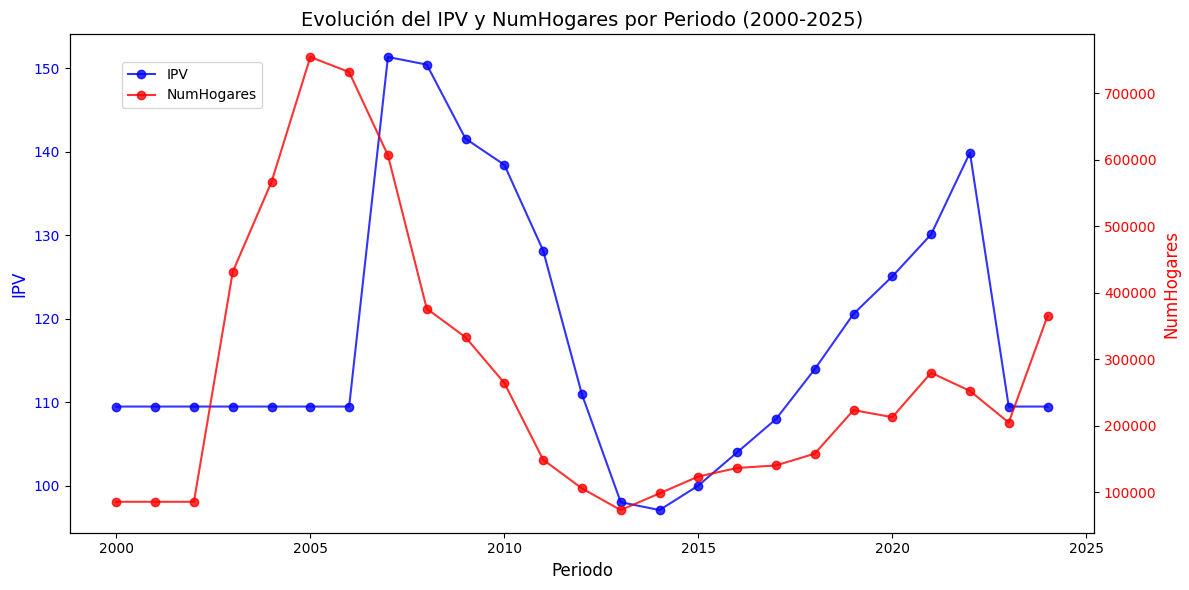

In [65]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Agrupar los datos por 'Periodo' y calcular la media de IPV y NumHogares
ipv = data.groupby('Periodo')['IPV'].mean()
NumHogares = data.groupby('Periodo')['NumHogares'].mean()

# Gráfico para el IPV en el eje Y izquierdo
ax1.plot(ipv.index, ipv.values, marker='o', linestyle='-', color='b', alpha=0.8, label='IPV')
ax1.set_xlabel('Periodo', fontsize=12)
ax1.set_ylabel('IPV', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y para las NumHogares
ax2 = ax1.twinx()
ax2.plot(NumHogares.index, hipotecas.values, marker='o', linestyle='-', color='r', alpha=0.8, label='NumHogares')
ax2.set_ylabel('NumHogares', fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Título del gráfico
plt.title('Evolución del IPV y NumHogares por Periodo (2000-2025)', fontsize=14)

# Mostrar leyendas separadas para ambos ejes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

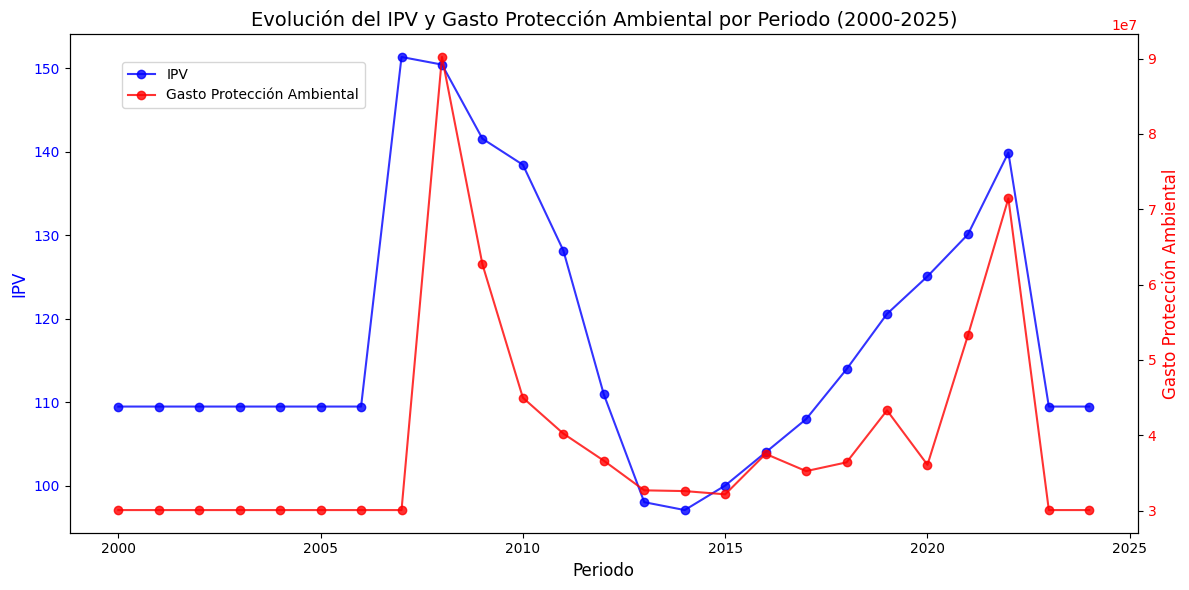

In [66]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Agrupar los datos por 'Periodo' y calcular la media de IPV y Gasto en Protección Ambiental
ipv = data.groupby('Periodo')['IPV'].mean()
gasto_ambiental = data.groupby('Periodo')['GastoProteccionAmbiental'].mean()

# Gráfico para el IPV en el eje Y izquierdo
ax1.plot(ipv.index, ipv.values, marker='o', linestyle='-', color='b', alpha=0.8, label='IPV')
ax1.set_xlabel('Periodo', fontsize=12)
ax1.set_ylabel('IPV', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y para el Gasto en Protección Ambiental
ax2 = ax1.twinx()
ax2.plot(gasto_ambiental.index, gasto_ambiental.values, marker='o', linestyle='-', color='r', alpha=0.8, label='Gasto Protección Ambiental')
ax2.set_ylabel('Gasto Protección Ambiental', fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Título del gráfico
plt.title('Evolución del IPV y Gasto Protección Ambiental por Periodo (2000-2025)', fontsize=14)

# Mostrar leyendas separadas para ambos ejes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
